In [11]:

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier



In [2]:

# Load the Covertype dataset
print("Loading Covertype dataset...")
X, y = fetch_covtype(return_X_y=True)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Unique values in y:", np.unique(y))

print("-" * 40)





Loading Covertype dataset...
Shape of X: (581012, 54)
Shape of y: (581012,)
Unique values in y: [1 2 3 4 5 6 7]
----------------------------------------


In [3]:

from collections import Counter

unique_values, counts = np.unique(y, return_counts=True)

print("Number of unique values in y:", len(unique_values))
print("Number of each unique value:")
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")


Number of unique values in y: 7
Number of each unique value:
Value: 1, Count: 211840
Value: 2, Count: 283301
Value: 3, Count: 35754
Value: 4, Count: 2747
Value: 5, Count: 9493
Value: 6, Count: 17367
Value: 7, Count: 20510


In [4]:


# Create a dictionary to store the desired counts
desired_counts = {1: 20000, 2: 20000, 3: 20000, 4: 2747, 5: 9493, 6: 17367, 7: 20510}

# Create lists to store the new X and y values
new_X = []
new_y = []

# Iterate through the unique values and their counts
for value, count in zip(unique_values, counts):
    # If the value is in the desired counts, add the corresponding samples to the new lists
    if value in desired_counts:
        indices = np.where(y == value)[0]
        # Use a random sample to get the desired number of instances for each value.
        sampled_indices = np.random.choice(indices, size=min(desired_counts[value], count), replace=False)
        new_X.extend(X[sampled_indices])
        new_y.extend(y[sampled_indices])


# Convert the new lists to numpy arrays
X = np.array(new_X)
y = np.array(new_y)

# Print the new shape of X and y
print("-" * 40)
print("New Shape of X:", X.shape)
print("New Shape of y:", y.shape)

unique_values, counts = np.unique(y, return_counts=True)
print("Number of unique values in y:", len(unique_values))
print("Number of each unique value:")
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")

----------------------------------------
New Shape of X: (110117, 54)
New Shape of y: (110117,)
Number of unique values in y: 7
Number of each unique value:
Value: 1, Count: 20000
Value: 2, Count: 20000
Value: 3, Count: 20000
Value: 4, Count: 2747
Value: 5, Count: 9493
Value: 6, Count: 17367
Value: 7, Count: 20510


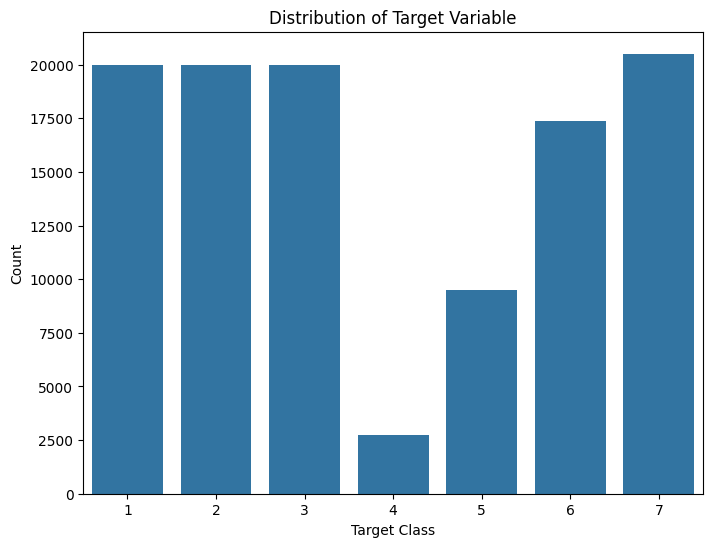

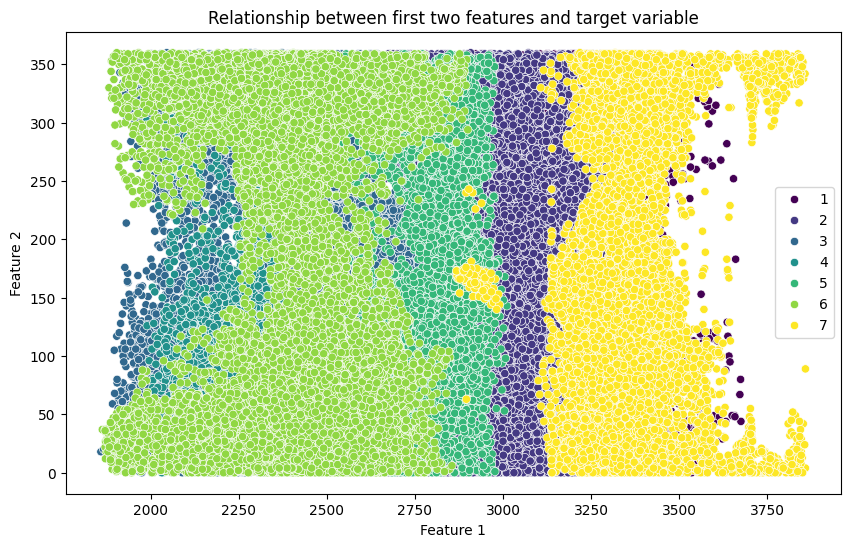

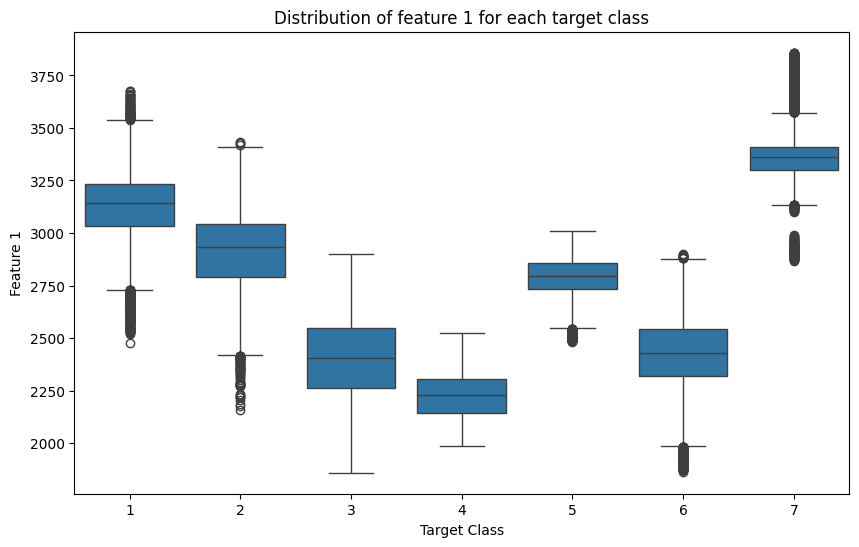

In [9]:


# Visualize the distribution of target variable (y)
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title('Distribution of Target Variable')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.show()

# Visualize the relationship between features and target variable (example with first two features)
# If X has more than 2 features, choose the features you want to visualize
if X.shape[1] >= 2:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='viridis')
    plt.title('Relationship between first two features and target variable')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Pairplot for visualizing relationships between multiple features (can be slow for large datasets)
#sns.pairplot(pd.DataFrame(X), hue=y) # uncomment if you have pandas and want to use pairplot
#plt.show()


# Box plots to show the distribution of a feature for each target class (example with first feature)
if X.shape[1] >= 1:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=y, y=X[:, 0])
    plt.title('Distribution of feature 1 for each target class')
    plt.xlabel('Target Class')
    plt.ylabel('Feature 1')
    plt.show()

In [6]:
# Split dataset into training and testing sets
print("Splitting dataset...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Splitting dataset...


Training Decision Tree Classifier...
Making predictions...
Evaluating the model...
Accuracy: 0.8849
Precision: 0.8845
Recall: 0.8849
F1 Score: 0.8847
Plotting confusion matrix...


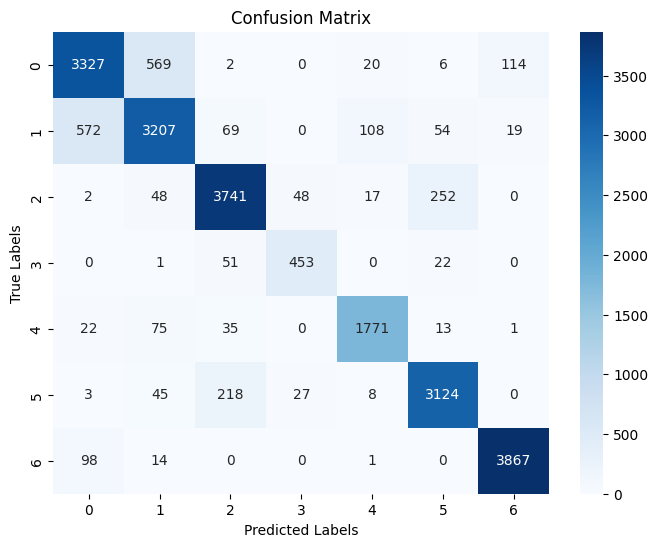

In [7]:


# Initialize and train the Decision Tree Classifier
print("Training Decision Tree Classifier...")
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
print("Making predictions...")
y_pred = clf.predict(X_test)

# Evaluate the model
print("Evaluating the model...")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot the confusion matrix
print("Plotting confusion matrix...")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [13]:


# Define the parameter grid for GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy',verbose=2, n_jobs=-1)  # Use all available cores
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Train a model with the best hyperparameters
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best hyperparameters: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.8766530872102688
Accuracy: 0.8867
Precision: 0.8862
Recall: 0.8867
F1 Score: 0.8863


In [10]:

filename = 'decision_tree_model.joblib'
joblib.dump(clf, filename)

print(f"Model saved to {filename}")

Model saved to decision_tree_model.joblib
